In [ ]:
import json
import pandas as pd
import numpy as np
from pandas import json_normalize
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
with open('houses.json','r', encoding='utf-8') as json_file:
    data = json.load(json_file)
totalData = data.get('data')
df = json_normalize(totalData)
df.columns

Index(['identifier', 'title', 'totalPrice', 'unitPrice', 'images', 'age',
       'floorArea', 'floorAreaUnit', 'numOfBeds', 'numberOfParking',
       'description', 'seoDescription', 'bread_crumbs',
       'location.locationName', 'location.longitude', 'location.latitude',
       'location.targetGlobalLocation.id',
       'location.targetGlobalLocation.type', 'type.landuseType',
       'type.propertyType', 'features.parking', 'features.lobby',
       'features.warehouse', 'features.sports_hall', 'features.guard',
       'features.elevator', 'features.balcony', 'features.swimming_pool',
       'features.sauna', 'features.air_conditioning',
       'features.conference_hall', 'features.roof_garden',
       'features.remote_door', 'features.jacuzzi', 'features.central_antenna',
       'contact.type', 'contact.fullName', 'contact.callNumber',
       'contact.departmentName', 'contact.departmentLogoUrl',
       'contact.departmentId', 'contact.whatsappAvailibility', 'graph.content',
       '

In [ ]:
df.drop('features.null', axis=1, inplace=True)

In [ ]:
recordFeatures = {
    'پارکینگ': 'parking',
    'لابی': 'lobby',
    'انباری': 'warehouse',
    'سالن ورزش': 'sports_hall',
    'نگهبان': 'guard',
    'آسانسور': 'elevator',
    'بالکن': 'balcony',
    'استخر': 'swimming_pool',
    'سونا': 'sauna',
    'تهویه مطبوع': 'air_conditioning',
    'سالن اجتماعات': 'conference_hall',
    'روف گاردن': 'roof_garden',
    'درب ریموت': 'remote_door',
    'جکوزی': 'jacuzzi',
    'آنتن مرکزی': 'central_antenna',
}
features = ['totalPrice', 'floorArea', 'numOfBeds']
recordFeaturesColumns=[]
# for item in recordFeatures.items():
#   recordFeaturesColumns.append('features.' + item[1])
regions=[]
for item in df['bread_crumbs']:
  regions.append(item[3].split(' ')[1])
df['region']=regions
features.append('region')
features.extend(recordFeaturesColumns.copy())
print(features)
df = df[features]

['totalPrice', 'floorArea', 'numOfBeds', 'region']


In [ ]:
# df.dropna(inplace=True)
# print(df.columns)
# newPrice=[]
# for item in df["totalPrice"]:
#     newPrice.append(int(str(item)[:4]))
# df['totalPrice'] = df['totalPrice'].replace(np.asanyarray(df["totalPrice"]), newPrice)
# df.info()
df.nunique()
# df.drop([])

TypeError: ignored

In [ ]:
df.isnull().sum()

totalPrice    303
floorArea       0
numOfBeds     182
region          0
dtype: int64

In [ ]:
df.shape

(3542, 48)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

totalPrice    0
floorArea     0
numOfBeds     0
region        0
dtype: int64

In [ ]:
for item in recordFeaturesColumns:
  df[item]=df[item].astype('category').cat.codes

In [ ]:
df.shape

(3095, 19)

In [ ]:
df.head(2)

,totalPrice,floorArea,numOfBeds,region
0,3.100000e+09,47.0,1.0,3
1,1.449500e+10,223.0,4.0,3


In [ ]:
x = np.asanyarray(df[df.columns.difference(['totalPrice'])])
y = np.asanyarray(df['totalPrice'])
print(x)
print(y)

[[47.0 1.0 '3']
 [223.0 4.0 '3']
 [134.0 2.0 '3']
 ...
 [260.0 3.0 '1']
 [390.0 4.0 '1']
 [670.0 4.0 '1']]
[3.1000e+09 1.4495e+10 1.5400e+10 ... 3.3800e+10 7.0200e+10 1.6080e+11]


In [ ]:
df.columns

Index(['totalPrice', 'floorArea', 'numOfBeds', 'region'], dtype='object')

In [ ]:
df.describe()

,totalPrice,floorArea,numOfBeds
count,3.095000e+03,3095.000000,3095.000000
mean,2.028497e+10,124.537480,2.271082
std,4.246813e+11,73.635524,0.838929
min,3.500000e+03,9.000000,0.000000
25%,4.264000e+09,76.500000,2.000000
50%,7.510000e+09,110.000000,2.000000
75%,1.377500e+10,150.000000,3.000000
max,2.354500e+13,1250.000000,15.000000


In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

In [ ]:
# x_train = StandardScaler().fit_transform(x_train)
# x_test = StandardScaler().fit_transform(x_test)

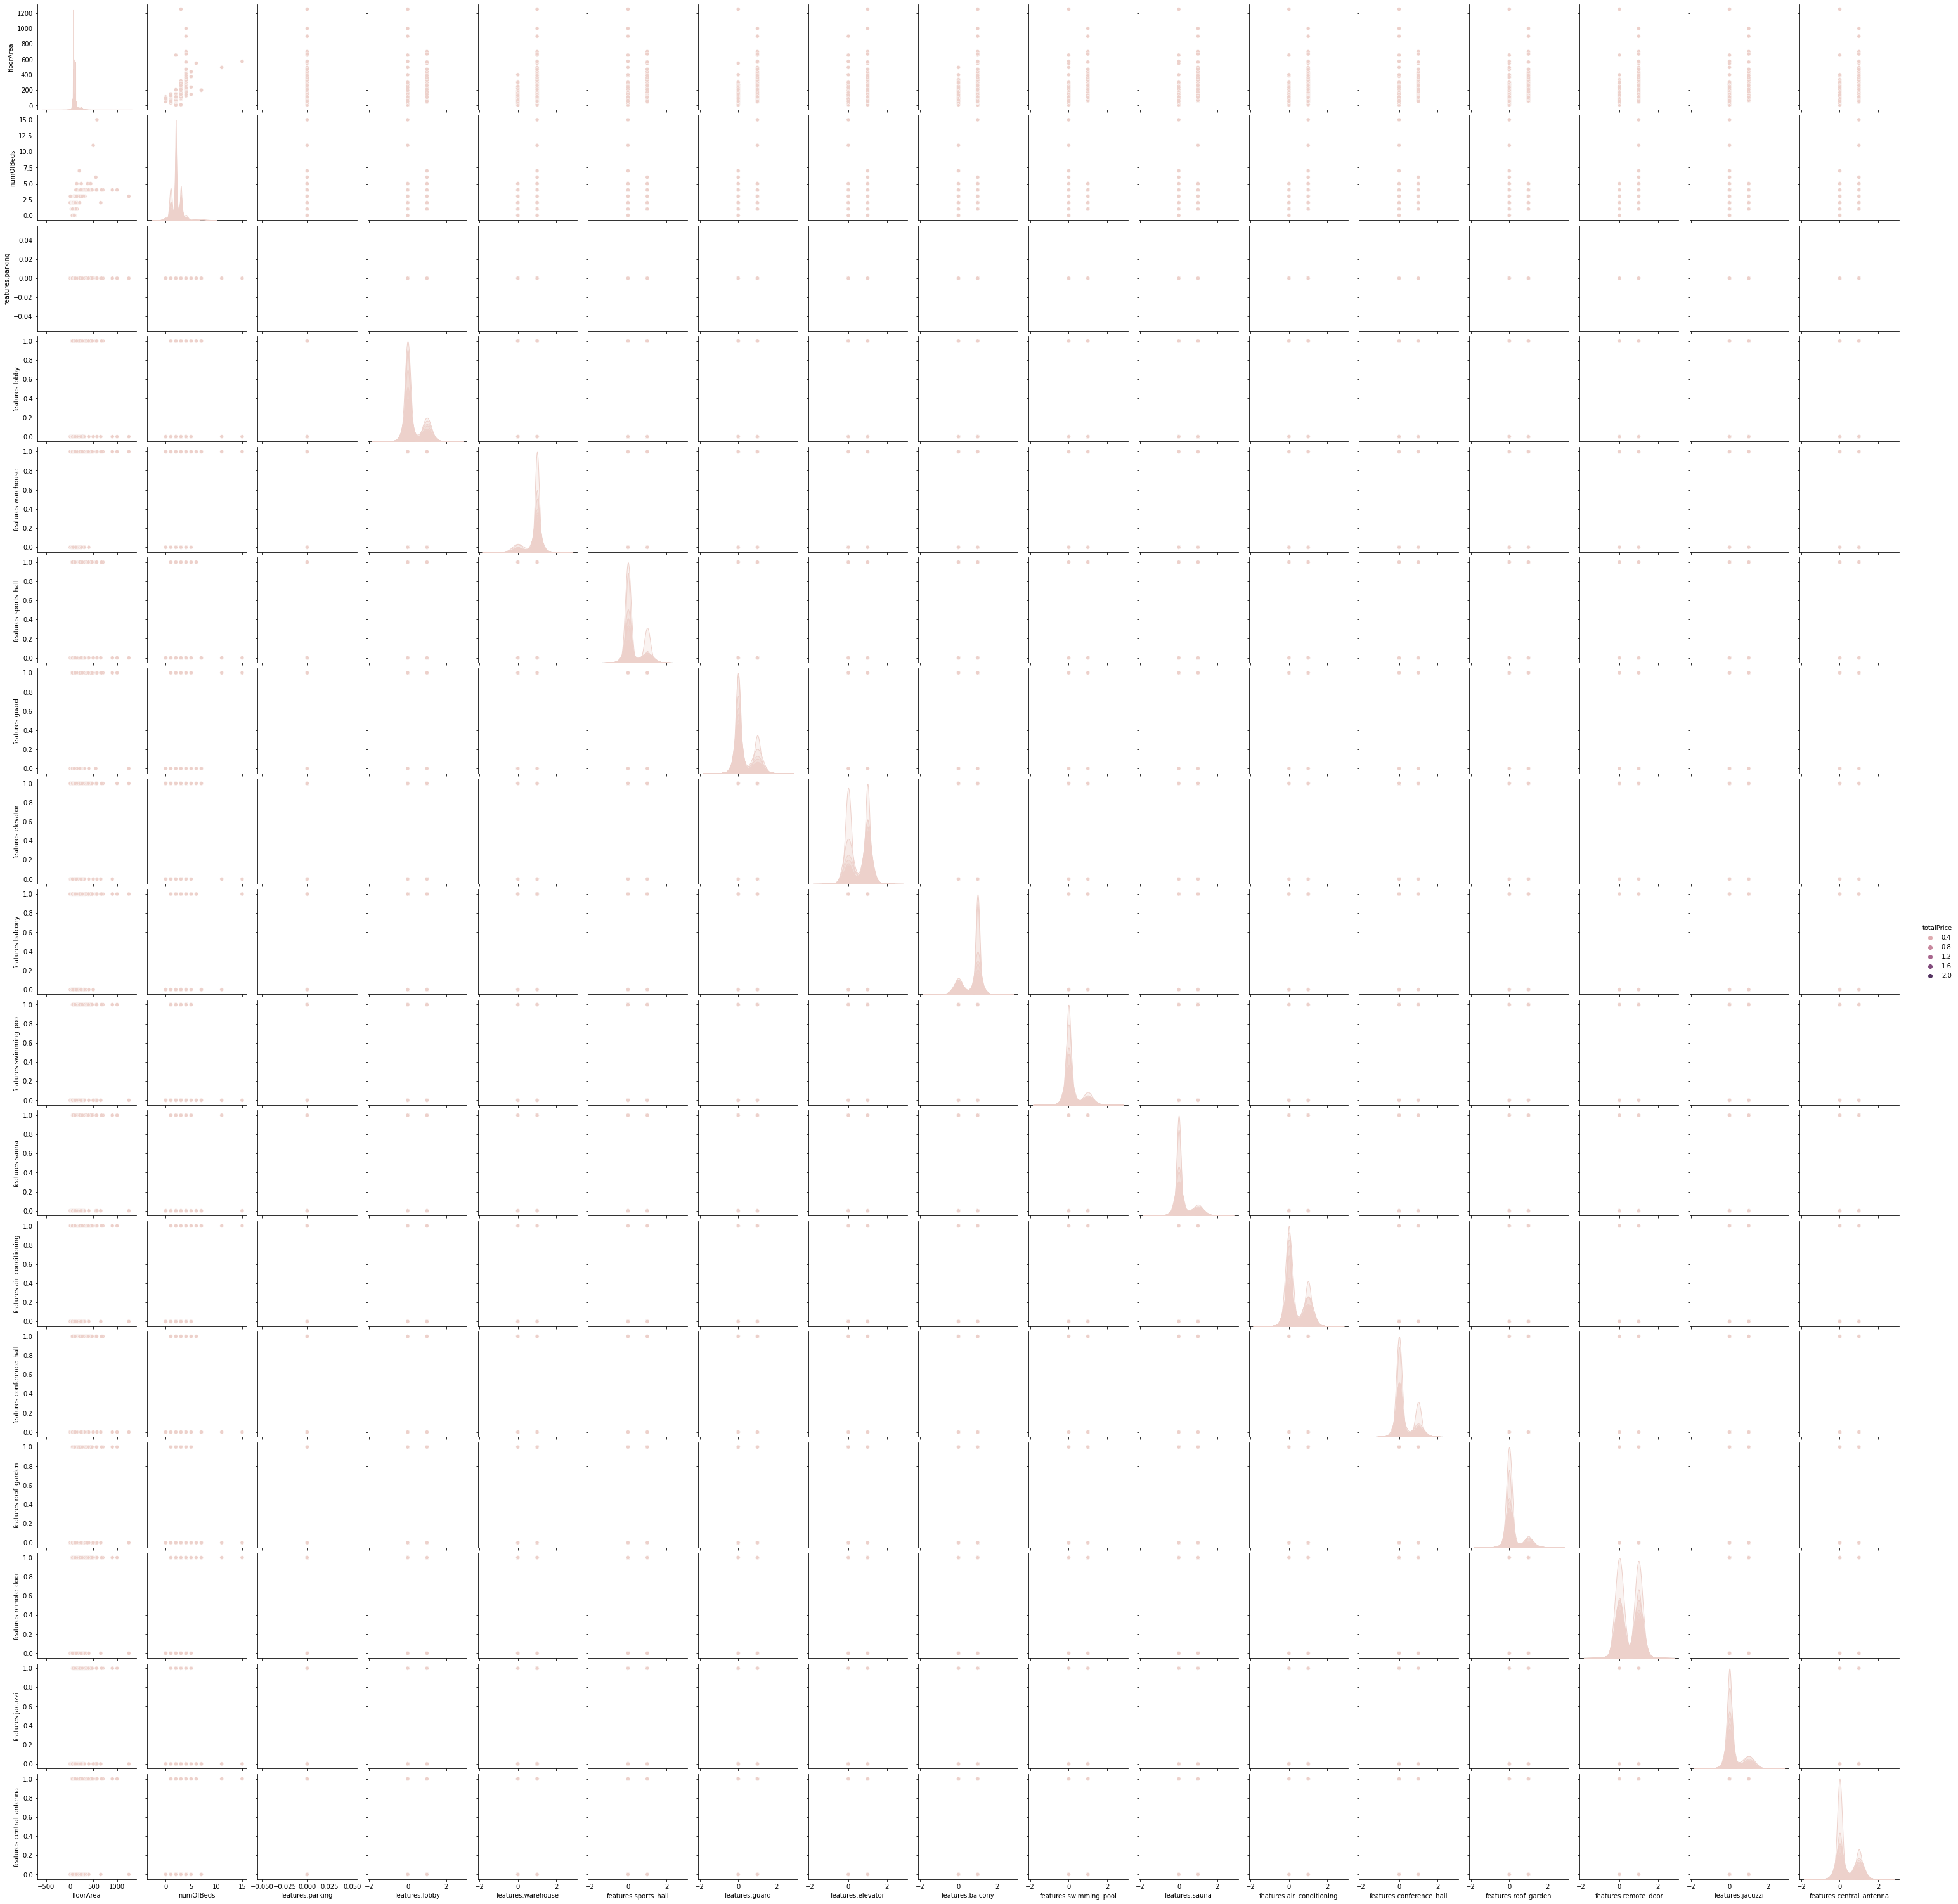

In [ ]:
import seaborn as sns
sns.pairplot(df,hue='totalPrice')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(random_state=42)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)


-48.430275407906116

In [ ]:
print(x_test)
new_pred = reg.predict([[87,2,5]])
new_pred

[[ 0.41376011  0.86900748 -0.2209499 ]
 [ 1.02497694  0.86900748 -0.46199323]
 [-0.33328268 -0.32318142  0.02009343]
 ...
 [-0.31970008 -0.32318142 -0.70303656]
 [-0.45552605 -0.32318142  0.02009343]
 [-0.9716647  -1.51537032  0.02009343]]


array([2.253991e+11])

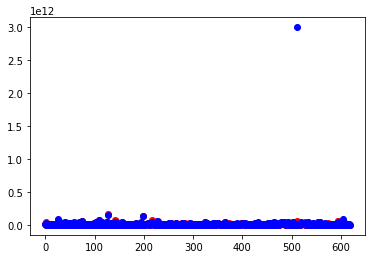

In [ ]:
plt.scatter(list(range(len(y_test))),y_test,c='r')
plt.scatter(list(range(len(y_test))),y_pred,c='b')
# plt.scatter(y_test,y_pred,c='g')
plt.show()

In [ ]:
y_test

array([1.488000e+10, 3.780000e+10, 4.800000e+09, 1.440000e+10,
       4.800000e+09, 3.900000e+09, 9.700000e+09, 7.380000e+09,
       1.050000e+10, 3.099000e+09, 1.000000e+10, 4.200000e+09,
       8.500000e+09, 4.968000e+09, 6.900000e+09, 6.499000e+09,
       1.650000e+09, 5.400000e+09, 1.350000e+09, 1.667500e+10,
       6.600000e+09, 3.750000e+09, 1.315000e+10, 1.050000e+10,
       4.000000e+09, 1.285000e+10, 5.166000e+10, 2.830000e+09,
       1.700000e+10, 2.750000e+10, 7.650000e+09, 2.291000e+10,
       3.200000e+10, 6.500000e+09, 4.320000e+09, 7.625000e+09,
       1.875000e+10, 1.100000e+10, 1.360000e+10, 2.800000e+09,
       3.915000e+10, 3.400000e+09, 1.080000e+10, 1.120000e+10,
       3.900000e+09, 3.400000e+09, 4.200000e+09, 1.984000e+10,
       3.109900e+10, 1.200000e+10, 1.343000e+10, 2.730000e+10,
       1.650000e+09, 1.520000e+10, 8.249000e+09, 2.700000e+10,
       8.700000e+09, 1.700000e+09, 3.172500e+10, 3.600000e+09,
       1.897500e+10, 4.800000e+09, 2.375000e+10, 8.7000

In [ ]:
accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
print(y_pred[:5])
print(y_test[:5])
linearReg_acc=r2_score(y_test, y_pred)
linearReg_mse=mean_squared_error(y_test, y_pred)
print('r2_score => ', linearReg_acc)
print('MSE => ', linearReg_mse)

[3629.22596897 3459.51733071 3342.61508877 5047.12681808 4285.57946393]
[1488. 3780. 4800. 1440. 4800.]
r2_score =>  0.06635191900825488
MSE =>  5194463.319443925


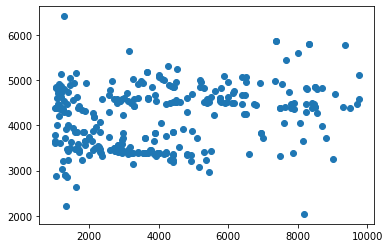

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics,svm

In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
cell_svm=svm.SVC(kernel='sigmoid')
cell_svm.fit(x_train, y_train)
y_pred_svm=cell_svm.predict(x_test)
y_pred_svm_new=cell_svm.predict([[87,2,5]])
sigmoidSVM_acc=r2_score(y_test, y_pred_svm)
sigmoidSVM_mse=mean_squared_error(y_test, y_pred_svm)
print('r2_score => ', sigmoidSVM_acc)
print('MSE => ', sigmoidSVM_mse)
print(y_pred_svm_new)

r2_score =>  0.3186391893728163
MSE =>  1.2743486040495292e+20
[1.54e+10]


In [ ]:
cell_svm=svm.SVC(kernel='rbf')
cell_svm.fit(x_train, y_train)
y_pred_svm=cell_svm.predict(x_test)
rbfSVM_acc=r2_score(y_test, y_pred_svm)
rbfSVM_mse=mean_squared_error(y_test, y_pred_svm)
print('r2_score => ', rbfSVM_acc)
print('MSE => ', rbfSVM_mse)

r2_score =>  -0.4737767290369381
MSE =>  8199533.974193549


In [ ]:
cell_svm=svm.SVC(kernel='poly')
cell_svm.fit(x_train, y_train)
y_pred_svm=cell_svm.predict(x_test)
polySVM_acc=r2_score(y_test, y_pred_svm)
polySVM_mse=mean_squared_error(y_test, y_pred_svm)
print('r2_score => ', polySVM_acc)
print('MSE => ', polySVM_mse)

r2_score =>  -0.1193008850706212
MSE =>  6227365.009677419


In [ ]:
print('linearReg_acc',linearReg_acc)
print('sigmoidSVM_acc',sigmoidSVM_acc)
print('rbfSVM_acc',rbfSVM_acc)
print('linearReg_acc',polySVM_acc)
print('--------------')
print('linearReg_mse => ', linearReg_mse)
print('sigmoidSVM_mse => ', sigmoidSVM_mse)
print('rbfSVM_mse => ', rbfSVM_mse)
print('sigmoidSVM_mse => ', sigmoidSVM_mse)
print('polySVM_mse => ', polySVM_mse)

linearReg_acc 0.06635191900825488
sigmoidSVM_acc -0.47946771431796575
rbfSVM_acc -0.4737767290369381
linearReg_acc -0.1193008850706212
--------------
linearReg_mse =>  5194463.319443925
sigmoidSVM_mse =>  8231196.45483871
rbfSVM_mse =>  8199533.974193549
sigmoidSVM_mse =>  8231196.45483871
polySVM_mse =>  6227365.009677419


In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(18, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 18)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=18, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [ ]:
from torch import optim,nn
criterion=nn.modules.loss.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

validation_percent=0.1

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=0)
x_train, x_valid, y_train, y_valid = train_test_split( x_train, y_train, test_size=0.1, random_state=0)
# n_train= len(x_train)
# indices=list(range(n_train))
# np.random.shuffle(indices)
# split=int(np.floor(n_train*validation_percent))
# train_index=indices[split:]
# valid_index=indices[:split]

# train_sampler=SubsetRandomSampler(train_index)
# valid_sampler=SubsetRandomSampler(valid_index)
# prepare data loaders
train_loader = torch.utils.data.DataLoader(x_train, batch_size=batch_size,
    num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(x_valid, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(x_test, batch_size=batch_size, 
    num_workers=num_workers)
print(train_loader.dataset)
print('-------------------')
# print(train_loader.dataset.test_labels[0])

[[116.0 2.0 '3']
 [195.0 3.0 '2']
 [90.0 2.0 '3']
 ...
 [80.0 2.0 '2']
 [50.0 1.0 '7']
 [55.0 1.0 '5']]
-------------------


In [ ]:
# df
newArr=[]
for item in df.iterrows():
  xx=item[1][df.columns.difference(['totalPrice'])].values
  yy=item[1]['totalPrice']
  newArr.append({'data':np.asanyarray(xx),'label':yy})

print(newArr)

[{'data': array([47.0, 1.0, '3'], dtype=object), 'label': 3100000000.0}, {'data': array([223.0, 4.0, '3'], dtype=object), 'label': 14495000000.0}, {'data': array([134.0, 2.0, '3'], dtype=object), 'label': 15400000000.0}, {'data': array([109.0, 2.0, '4'], dtype=object), 'label': 6950000000.0}, {'data': array([94.0, 2.0, '4'], dtype=object), 'label': 5600000000.0}, {'data': array([63.0, 1.0, '4'], dtype=object), 'label': 3650000000.0}, {'data': array([47.0, 1.0, '3'], dtype=object), 'label': 3100000000.0}, {'data': array([223.0, 4.0, '3'], dtype=object), 'label': 14495000000.0}, {'data': array([134.0, 2.0, '3'], dtype=object), 'label': 15400000000.0}, {'data': array([261.0, 3.0, '3'], dtype=object), 'label': 17000000000.0}, {'data': array([125.0, 3.0, '3'], dtype=object), 'label': 10000000000.0}, {'data': array([60.0, 1.0, '3'], dtype=object), 'label': 7500000000.0}, {'data': array([160.0, 3.0, '3'], dtype=object), 'label': 20800000000.0}, {'data': array([98.0, 2.0, '3'], dtype=object), 

In [ ]:
x_train = torch.from_numpy(np.array(x_train).astype('float'))
y_train = torch.from_numpy(np.array(y_train).astype('float'))
x_valid = torch.from_numpy(np.array(x_valid).astype('float'))
y_valid = torch.from_numpy(np.array(y_valid).astype('float'))
x_test = torch.from_numpy(np.array(x_test).astype('float'))
y_test = torch.from_numpy(np.array(y_test).astype('float'))
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([2506, 18])
torch.Size([2506])
torch.Size([279, 18])
torch.Size([279])
torch.Size([310, 18])
torch.Size([310])


In [ ]:
# Train & Validation Section
epochs=10
valid_loss_min=np.Inf
for e in range(epochs):
  train_loss=0
  valid_loss=0
  # Train Section
  for items in x_train:
    optimizer.zero_grad()
    output=model(items.float())
    loss=criterion(output,y_train)
    loss.backward()
    optimizer.step()
    train_loss+= loss.item() * items.size(0)
  # Validation Section
  model.eval()
  for items in x_valid:
    output=model(items)
    loss=criterion(output,y_valid)
    valid_loss+= loss.item() * items.size(0)
  total_train_loss=train_loss/len(x_train.dataset)
  total_valid_loss=valid_loss/len(x_valid.dataset)
  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(e+1, total_train_loss, total_valid_loss))
  if total_valid_loss <= valid_loss_min:
     print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min, total_valid_loss))
     torch.save(model.state_dict(),'model.pt')
     valid_loss_min=total_valid_loss
  print('----------------------------')

ValueError: ignored